# Exercícios

Vamos trabalhar com dados proveniente de duas fontes diferentes. Considere os dados do Índice de Desenvolvimento da Educação Básica (Ideb) disponíveis em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio) e os dados sobre Produto Interno Bruto (PIB) disponíveis em [PIB](https://basedosdados.org/dataset/br-ibge-pib?bdm_table=municipio).

No conjunto de dados `ideb.csv` vamos selecionar as colunas `ano`, `id_municipio`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb` provenientes dos dados do Ideb, e as colunas `pib` e `impostos_liquidos` do `pib.csv`.

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# Ignorando warnings de execução
warnings.filterwarnings("ignore")

In [45]:
# Definindo o tamanho dos gráficos
plt.rcParams['figure.figsize'] = (8, 5)

In [46]:
# Escolhendo paleta de cores dos gráficos
sns.set_palette("Accent")
sns.set_style("whitegrid")
sns.set(font_scale=1)

In [3]:
# Montando o acesso ao Google Drive, para acessar os dados necessários
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Definindo a pasta onde estão os arquivos
file_path = ('/content/drive/MyDrive/Faculdade/2. Sirius/1. Módulo/2. Estatística Básica para BI/')

In [5]:
# Carregando o arquivo do Ideb
ideb = pd.read_csv(file_path + 'dados_ideb_1.csv')

# Carregando o arquivo do PIB
pib = pd.read_csv(file_path + 'dados_pib.csv')

In [6]:
# Visualizando os dados do Ideb
ideb.head(5)

,ano,sigla_uf,id_municipio,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,2005,AC,1200302,municipal,fundamental,iniciais (1-5),53.9,0.561795,167.8,165.60,4.177761,2.3,NaN
1,2005,AC,1200328,estadual,fundamental,iniciais (1-5),49.3,0.501470,151.8,149.60,3.578558,1.8,NaN
2,2005,AC,1200328,municipal,fundamental,iniciais (1-5),48.8,0.494267,163.6,155.80,3.920963,1.9,NaN
3,2005,AC,1200328,publica,fundamental,iniciais (1-5),48.8,0.497858,159.0,153.39,3.785995,1.9,NaN
4,2005,AC,1200336,municipal,fundamental,iniciais (1-5),74.7,0.752579,138.0,134.19,3.038804,2.3,NaN


In [7]:
# Verificando o tamanho do df Ideb
ideb.shape

(294426, 13)

In [8]:
# Visualizando informações iniciais do df Ideb
ideb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294426 entries, 0 to 294425
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ano                          294426 non-null  int64  
 1   sigla_uf                     294426 non-null  object 
 2   id_municipio                 294426 non-null  int64  
 3   rede                         294426 non-null  object 
 4   ensino                       294426 non-null  object 
 5   anos_escolares               294426 non-null  object 
 6   taxa_aprovacao               230833 non-null  float64
 7   indicador_rendimento         230823 non-null  float64
 8   nota_saeb_matematica         197870 non-null  float64
 9   nota_saeb_lingua_portuguesa  197870 non-null  float64
 10  nota_saeb_media_padronizada  222078 non-null  float64
 11  ideb                         222045 non-null  float64
 12  projecao                     242395 non-null  float64
dtyp

In [9]:
# Criando função para visualizar estatísticas básicas dos df + amplitude e variância
def complete_describe(df):
    # Calcula as estatísticas descritivas básicas
    descriptive_statistics = df.describe()

    # Calcula a amplitude dos dados (diferença entre máximo e mínimo)
    descriptive_statistics.loc['range'] = descriptive_statistics.loc['max'] - descriptive_statistics.loc['min']

    # Calcula a variância
    descriptive_statistics.loc['var'] = df.var()

    # Arredonda os valores para uma casa decimal
    descriptive_statistics = descriptive_statistics.round(1)

    return descriptive_statistics

In [10]:
# Verificando estatísticas básicas do df Ideb
complete_describe(ideb)

,ano,id_municipio,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
count,294426.0,2.944260e+05,230833.0,230823.0,197870.0,197870.0,222078.0,222045.0,242395.0
mean,2013.7,3.242511e+06,86.1,0.9,229.1,218.1,5.0,4.3,4.5
std,5.3,9.968160e+05,10.6,0.1,34.0,36.7,0.9,1.1,1.1
min,2005.0,1.100015e+06,0.0,0.0,120.8,114.4,1.8,0.1,0.6
25%,2009.0,2.509396e+06,79.9,0.8,205.7,189.7,4.3,3.5,3.8
50%,2015.0,3.141504e+06,88.1,0.9,231.8,221.3,4.9,4.2,4.5
75%,2019.0,4.121604e+06,94.5,0.9,253.2,245.4,5.5,5.1,5.3
max,2021.0,5.300108e+06,100.0,1.0,414.9,371.7,9.4,9.4,9.0
range,16.0,4.200093e+06,100.0,1.0,294.1,257.3,7.5,9.3,8.4
var,27.6,9.936422e+11,111.4,0.0,1153.0,1348.1,0.8,1.3,1.1


In [11]:
# Visualizando os dados do PIB
ideb.head(5)

,ano,sigla_uf,id_municipio,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,2005,AC,1200302,municipal,fundamental,iniciais (1-5),53.9,0.561795,167.8,165.60,4.177761,2.3,NaN
1,2005,AC,1200328,estadual,fundamental,iniciais (1-5),49.3,0.501470,151.8,149.60,3.578558,1.8,NaN
2,2005,AC,1200328,municipal,fundamental,iniciais (1-5),48.8,0.494267,163.6,155.80,3.920963,1.9,NaN
3,2005,AC,1200328,publica,fundamental,iniciais (1-5),48.8,0.497858,159.0,153.39,3.785995,1.9,NaN
4,2005,AC,1200336,municipal,fundamental,iniciais (1-5),74.7,0.752579,138.0,134.19,3.038804,2.3,NaN


In [12]:
# Verificando o tamanho do df PIB
pib.shape

(100186, 9)

In [13]:
# Visualizando informações iniciais do df PIB
pib.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100186 entries, 0 to 100185
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   ano                100186 non-null  int64
 1   id_municipio       100186 non-null  int64
 2   pib                100186 non-null  int64
 3   impostos_liquidos  100186 non-null  int64
 4   va                 100186 non-null  int64
 5   va_agropecuaria    100186 non-null  int64
 6   va_industria       100186 non-null  int64
 7   va_servicos        100186 non-null  int64
 8   va_adespss         100186 non-null  int64
dtypes: int64(9)
memory usage: 7.6 MB


In [14]:
# Verificando estatísticas básicas do df PIB
complete_describe(pib)

,ano,id_municipio,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
count,100186.0,1.001860e+05,1.001860e+05,1.001860e+05,1.001860e+05,1.001860e+05,1.001860e+05,1.001860e+05,1.001860e+05
mean,2010.5,3.253204e+06,7.619733e+08,1.096863e+08,6.522870e+08,3.439481e+07,1.584994e+08,3.499350e+08,1.094578e+08
std,5.2,9.844761e+05,8.385963e+09,1.542878e+09,6.871267e+09,6.648170e+07,1.116227e+09,5.114940e+09,1.112400e+09
min,2002.0,1.100015e+06,-1.904643e+07,-1.508840e+07,-5.105931e+08,-2.298910e+06,-2.897193e+09,3.722780e+05,1.446664e+06
25%,2006.0,2.512101e+06,4.067108e+07,1.549594e+06,3.878616e+07,6.262198e+06,1.994533e+06,9.177218e+06,1.342454e+07
50%,2011.0,3.146255e+06,9.407137e+07,4.731432e+06,8.869322e+07,1.560820e+07,6.657800e+06,2.483633e+07,2.691132e+07
75%,2015.0,4.119103e+06,2.678639e+08,1.914664e+07,2.472861e+08,3.657381e+07,3.676115e+07,8.487002e+07,6.227092e+07
max,2019.0,5.300108e+06,7.638060e+11,1.324779e+11,6.313280e+11,2.482542e+09,6.689305e+10,5.283801e+11,1.072192e+11
range,17.0,4.200093e+06,7.638250e+11,1.324930e+11,6.318386e+11,2.484841e+09,6.979024e+10,5.283797e+11,1.072178e+11
var,26.9,9.691932e+11,7.032438e+19,2.380473e+18,4.721431e+19,4.419816e+15,1.245962e+18,2.616261e+19,1.237433e+18


### Atividade 1: Selecione apenas as colunas `ano`, `id_municipio`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb` provenientes dos dados do Ideb, apenas para o ano de 2019 e agrupado por município.

In [15]:
# Filtrando o df Ideb para o ano de 2019 e selecionando as colunas desejadas
ideb_2019 = ideb[ideb['ano'] == 2019][['ano', 'id_municipio', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']]

# Agrupando os dados pela média por id_municipio
ideb_2019_municipios = ideb_2019.groupby(['id_municipio']).mean().round(2)

# Visualizando o df
ideb_2019_municipios.head(10)

,ano,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
id_municipio,,,,
1100015,2019.0,253.28,242.25,5.05
1100023,2019.0,248.22,243.62,4.76
1100031,2019.0,229.50,221.50,4.85
1100049,2019.0,259.15,249.89,5.20
1100056,2019.0,266.29,254.33,5.64
1100064,2019.0,267.60,260.04,5.29
1100072,2019.0,262.16,245.12,5.18
1100080,2019.0,249.01,238.86,4.67
1100098,2019.0,255.29,243.69,5.26


### Atividade 2: Selecione as colunas `ano`, `id_municipio`, `pib` e `impostos_liquidos` dos dados do PIB, para o ano de 2019 e agrupado por município.

In [16]:
# Filtrando o df Ideb para o ano de 2019 e selecionando as colunas desejadas
pib_2019_municipios = pib[pib['ano'] == 2019][['ano', 'id_municipio', 'pib', 'impostos_liquidos']]

# Agrupando os dados pela média por id_municipio
pib_2019_municipios = pib_2019_municipios.groupby(['id_municipio']).sum()

# Visualizando o df
pib_2019_municipios.head(10)

,ano,pib,impostos_liquidos
id_municipio,,,
1100015,2019,495628767,29350985
1100023,2019,2578829725,284397627
1100031,2019,139959390,5997974
1100049,2019,2260643565,253988284
1100056,2019,506854457,76671376
1100064,2019,334851274,22070165
1100072,2019,349247369,10547528
1100080,2019,238768544,8220391
1100098,2019,624760162,53501338


### Atividade 3: Vamos juntar os dois DataFrames em um único. Para isso, vamos "unir" os dois dataframes pela variável `id_municipio`.

In [17]:
# Juntando os dois df de 2019 pelo id_municipio
municipios_2019 = pib_2019_municipios.merge(ideb_2019_municipios, how='left', on='id_municipio')

# Visualizando o novo df de municípios em 2019
municipios_2019.head(10)

,ano_x,pib,impostos_liquidos,ano_y,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
id_municipio,,,,,,,
1100015,2019,495628767,29350985,2019.0,253.28,242.25,5.05
1100023,2019,2578829725,284397627,2019.0,248.22,243.62,4.76
1100031,2019,139959390,5997974,2019.0,229.50,221.50,4.85
1100049,2019,2260643565,253988284,2019.0,259.15,249.89,5.20
1100056,2019,506854457,76671376,2019.0,266.29,254.33,5.64
1100064,2019,334851274,22070165,2019.0,267.60,260.04,5.29
1100072,2019,349247369,10547528,2019.0,262.16,245.12,5.18
1100080,2019,238768544,8220391,2019.0,249.01,238.86,4.67
1100098,2019,624760162,53501338,2019.0,255.29,243.69,5.26


### Atividade 4:  Verifique se há dados faltantes, além disso verifique se há alguma coluna irrelevante. Se houver, descarte-a.

In [18]:
# Conferindo dados faltantes
municipios_2019.isna().sum()

ano_x                           0
pib                             0
impostos_liquidos               0
ano_y                           0
nota_saeb_matematica           21
nota_saeb_lingua_portuguesa    21
ideb                           21
dtype: int64

In [19]:
# Removendo linhas com dados faltantes
municipios_2019.dropna(axis=0, inplace=True)

# Revalidando dados faltantes
municipios_2019.isna().sum()

ano_x                          0
pib                            0
impostos_liquidos              0
ano_y                          0
nota_saeb_matematica           0
nota_saeb_lingua_portuguesa    0
ideb                           0
dtype: int64

In [20]:
# Removendo colunas irrelevantes
municipios_2019.drop(labels=['ano_x', 'ano_y'], axis=1, inplace=True)

# Visualizando o novo df após transformações
municipios_2019.head(10)

,pib,impostos_liquidos,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
id_municipio,,,,,
1100015,495628767,29350985,253.28,242.25,5.05
1100023,2578829725,284397627,248.22,243.62,4.76
1100031,139959390,5997974,229.50,221.50,4.85
1100049,2260643565,253988284,259.15,249.89,5.20
1100056,506854457,76671376,266.29,254.33,5.64
1100064,334851274,22070165,267.60,260.04,5.29
1100072,349247369,10547528,262.16,245.12,5.18
1100080,238768544,8220391,249.01,238.86,4.67
1100098,624760162,53501338,255.29,243.69,5.26


### Atividade 5: Quais são os tipos das variáveis do DataFrame?

In [42]:
municipios_2019.dtypes

pib                              int64
impostos_liquidos                int64
nota_saeb_matematica           float64
nota_saeb_lingua_portuguesa    float64
ideb                           float64
dtype: object

**Tipo das variáveis**

*PIB*: Variável numérica discreta

*Impostos líquidos*: Variável numérica discreta

*Nota SAEB matemática*: Variável numérica contínua

*Nota SAEB língua portuguesa*: Variável numérica contínua

*IDEB*: Variável numérica contínua


### Atividade 6: Observando as variáveis envolvidas, você acha que deve existir alguma correlação entre quais delas?

Será que municípios com alta nota no Ideb possuem um PIB alto?

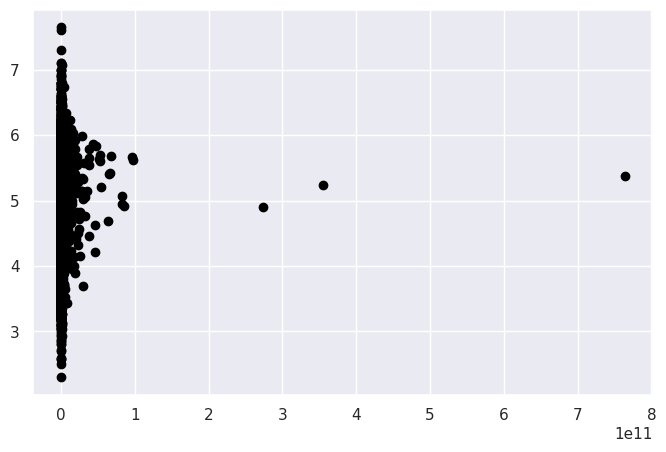

In [57]:
# Definindo as variáveis de interesse
pib_2019 = municipios_2019['pib']
ideb_2019 = municipios_2019['ideb']

# Visualizando a distribuição entre as variáveis
plt.scatter(pib_2019, ideb_2019, marker='o', color='black')
plt.show();

In [55]:
# Reduzindo a dimensionalidade do PIB
municipios_2019['pib_log']= np.log(municipios_2019['pib'])

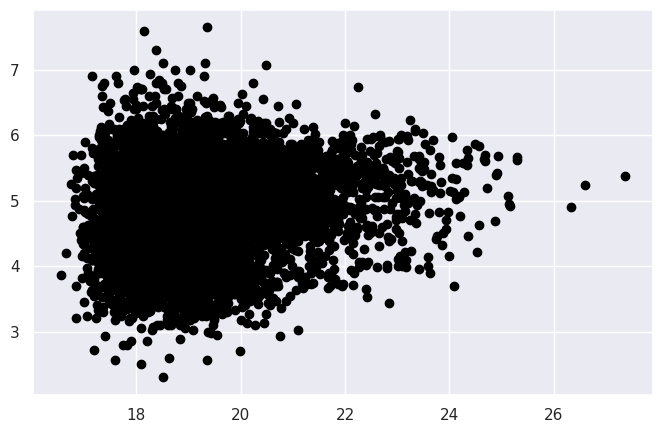

In [58]:
# Definindo as variáveis de interesse
pib_2019_log = municipios_2019['pib_log']
ideb_2019 = municipios_2019['ideb']

# Visualizando a distribuição entre as variáveis
plt.scatter(pib_2019_log, ideb_2019, marker='o', color='black')
plt.show();

Visualmente, o gráfico não apresenta uma relação direta entre as variáveis IDEB e PIB (neste caso, o PIB logartmizado, dada a dimensão do PIB padrão, em escala exponencial, em comparação com o IDEB, em escala linear).


In [66]:
# Definindo os 2 dataframes a serem testados
pib_ideb_default = municipios_2019[['pib', 'ideb']]
pib_ideb_not_default = municipios_2019[['pib_log', 'ideb']]

# Verificando a correlação entre as variáveis por meio de 3 métodos (Pearson, Kendall e Spearman)

pearson_default = pib_ideb_default.corr(method='pearson')

pearson_not_default = pib_ideb_not_default.corr(method='pearson')

kendall_default = pib_ideb_default.corr(method='kendall')

kendall_not_default = pib_ideb_not_default.corr(method='kendall')

spearman_default = pib_ideb_default.corr(method='spearman')

spearman_not_default = pib_ideb_not_default.corr(method='spearman')

# Exibindo os resultados
print(f'A correlação de Pearson, para o PIB e o IDEB é \n{pearson_default}\n')
print(f'A correlação de Pearson, para o PIB em escala logarítmica e o IDEB é \n{pearson_not_default}\n')
print(f'A correlação de Kendall, para o PIB e o IDEB é \n{kendall_default}\n')
print(f'A correlação de Kendall, para o PIB em escala logarítmica e o IDEB é \n{kendall_not_default}\n')
print(f'A correlação de Spearman, para o PIB e o IDEB é \n{spearman_default}\n')
print(f'A correlação de Spearman, para o PIB em escala logarítmica e o IDEB é \n{spearman_not_default}\n')

A correlação de Pearson, para o PIB e o IDEB é 
           pib      ideb
pib   1.000000  0.037065
ideb  0.037065  1.000000

A correlação de Pearson, para o PIB em escala logarítmica e o IDEB é 
          pib_log      ideb
pib_log  1.000000  0.148038
ideb     0.148038  1.000000

A correlação de Kendall, para o PIB e o IDEB é 
           pib      ideb
pib   1.000000  0.100703
ideb  0.100703  1.000000

A correlação de Kendall, para o PIB em escala logarítmica e o IDEB é 
          pib_log      ideb
pib_log  1.000000  0.100703
ideb     0.100703  1.000000

A correlação de Spearman, para o PIB e o IDEB é 
           pib      ideb
pib   1.000000  0.151932
ideb  0.151932  1.000000

A correlação de Spearman, para o PIB em escala logarítmica e o IDEB é 
          pib_log      ideb
pib_log  1.000000  0.151932
ideb     0.151932  1.000000



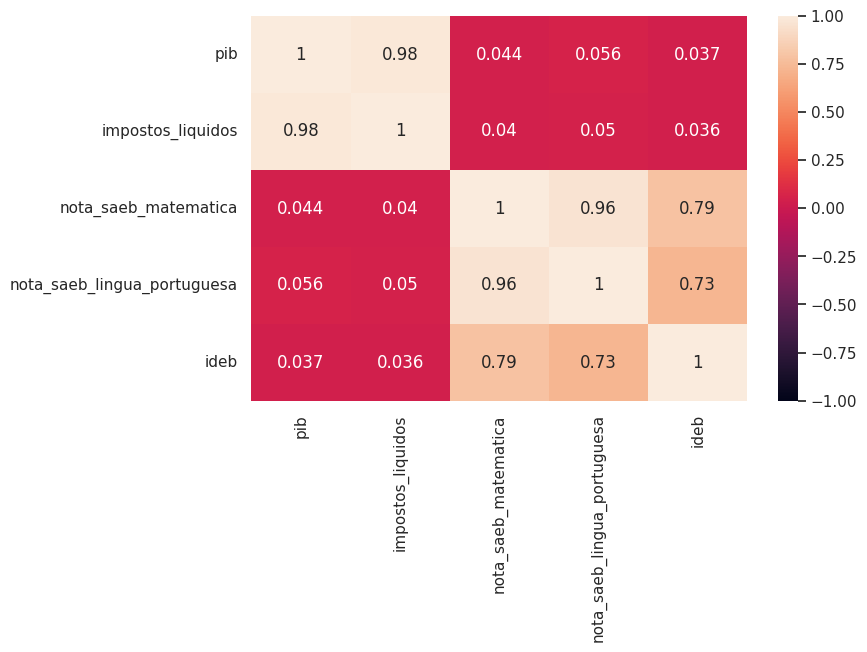

In [50]:
# Conferindo a correlação de Pearson entre as variáveis
sns.heatmap(municipios_2019.corr(method='pearson'), annot=True, vmin=-1, vmax=1);

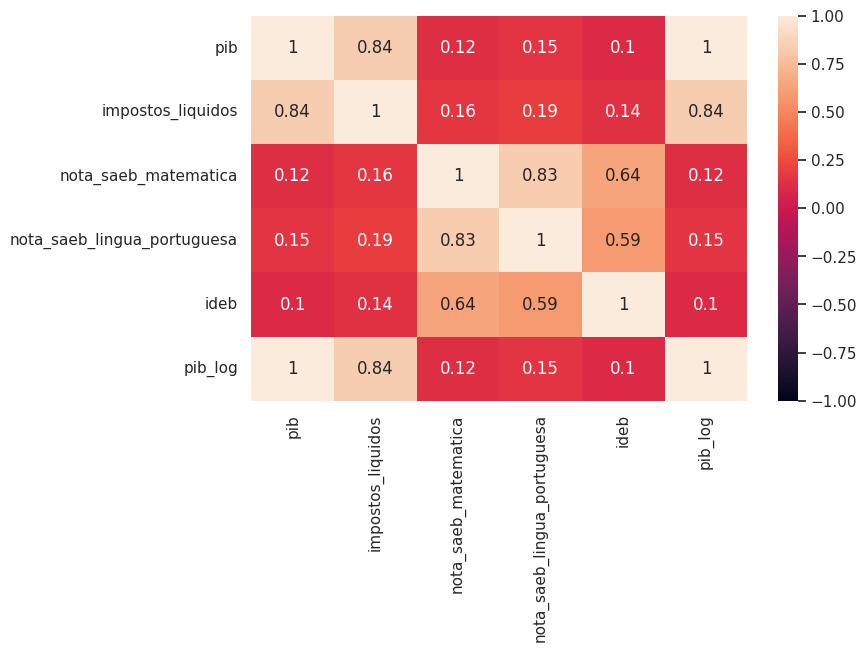

In [67]:
# Conferindo a correlação de Pearson entre as variáveis
sns.heatmap(municipios_2019.corr(method='kendall'), annot=True, vmin=-1, vmax=1);

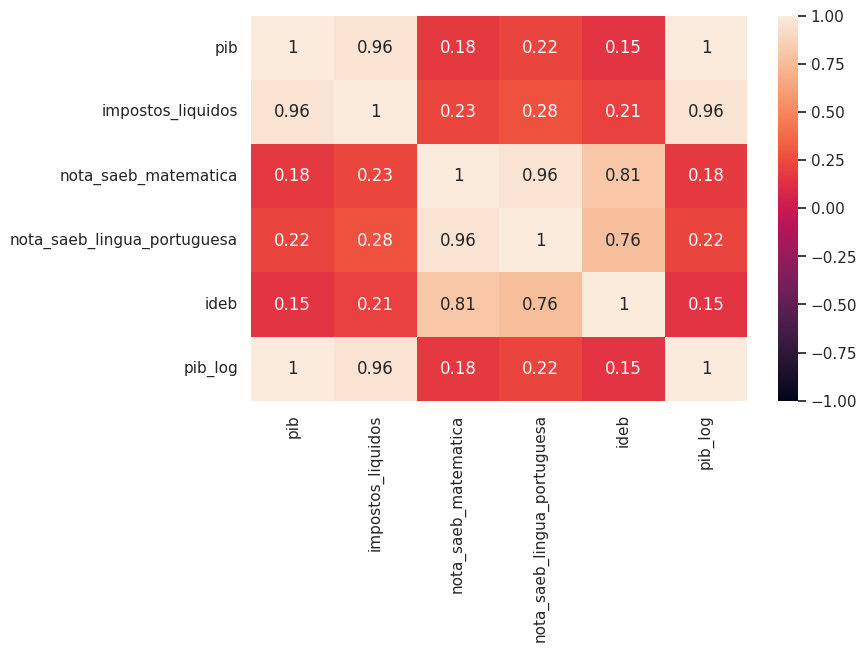

In [68]:
# Conferindo a correlação de Pearson entre as variáveis
sns.heatmap(municipios_2019.corr(method='spearman'), annot=True, vmin=-1, vmax=1);

### O que significa a correlação das variáveis `id_municipio` e `ideb`?

In [72]:
# Redefinindo o indice do df de municípios, para analisar a coluna 'id_municipio'
municipios_2019.reset_index(inplace=True)

# Visualizando df
municipios_2019.head()

,id_municipio,pib,impostos_liquidos,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,pib_log
0,1100015,495628767,29350985,253.28,242.25,5.05,20.021338
1,1100023,2578829725,284397627,248.22,243.62,4.76,21.670602
2,1100031,139959390,5997974,229.50,221.50,4.85,18.756863
3,1100049,2260643565,253988284,259.15,249.89,5.20,21.538915
4,1100056,506854457,76671376,266.29,254.33,5.64,20.043734


In [73]:
municipios_2019[['id_municipio', 'ideb']].corr(method='pearson')

,id_municipio,ideb
id_municipio,1.000000,0.479819
ideb,0.479819,1.000000


A partir da matriz de correlação acima, nota-se que existe uma correlação positiva moderada entre `id_municipio` e `ideb`.

Assim, a medida que aumenta o id_municipio, o IDEB também aumenta, o que indica que este ID é uma categorizaçção ordinal decrescente da classificação dos municípios.

Ou seja, o município de maior ID tende a ter um resultado do IDEB mais alto do que aquele com menor ID.

### Atividade 7: Vamos importar os dados de [Estatística de Segurança Pública do Rio de Janeiro](https://basedosdados.org/dataset/br-isp-estatisticas-seguranca?bdm_table=taxa_evolucao_mensal_uf) e observar os dados do dataframe.

In [23]:
# Carregando o arquivo do Ideb
seg_pub_rj = pd.read_csv(file_path + 'dados_seg_rj.csv')

In [24]:
# Visualizando os dados do df Segurança Pública do RJ
seg_pub_rj.head()

,ano,mes,mes_ano,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,2003,1,2003m01,4.01,0.04,0.14,4.19,0.61,4.80,2.48,...,NaN,NaN,41.71,2.78,0.98,0.02,NaN,NaN,304.90,3.0
1,2003,2,2003m02,3.97,0.03,0.08,4.08,0.76,4.83,2.46,...,NaN,NaN,41.16,2.89,1.27,0.03,NaN,NaN,309.05,3.0
2,2003,3,2003m03,4.17,0.03,0.11,4.32,0.77,5.08,2.26,...,NaN,NaN,39.43,3.14,1.06,0.05,NaN,NaN,309.13,3.0
3,2003,4,2003m04,3.98,0.07,0.10,4.15,0.85,5.00,2.02,...,NaN,NaN,38.29,2.35,0.82,0.03,NaN,NaN,300.72,3.0
4,2003,5,2003m05,4.08,0.04,0.14,4.25,0.65,4.91,2.59,...,NaN,NaN,37.00,2.84,1.00,0.03,NaN,NaN,310.15,3.0


In [25]:
# Verificando o tamanho do df Segurança Pública do RJ
seg_pub_rj.shape

(222, 57)

In [26]:
# Visualizando informações iniciais do df Segurança Pública do RJ
seg_pub_rj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 221
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ano                         222 non-null    int64  
 1   mes                         222 non-null    int64  
 2   mes_ano                     222 non-null    object 
 3   hom_doloso                  222 non-null    float64
 4   lesao_corp_morte            222 non-null    float64
 5   latrocinio                  222 non-null    float64
 6   cvli                        222 non-null    float64
 7   hom_por_interv_policial     222 non-null    float64
 8   letalidade_violenta         222 non-null    float64
 9   tentat_hom                  222 non-null    float64
 10  lesao_corp_dolosa           222 non-null    float64
 11  estupro                     222 non-null    float64
 12  hom_culposo                 222 non-null    float64
 13  lesao_corp_culposa          222 non

In [27]:
# Verificando estatísticas básicas do df Segurança Pública do RJ
complete_describe(seg_pub_rj)

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
count,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0,...,186.0,186.0,222.0,222.0,222.0,222.0,90.0,90.0,222.0,222.0
mean,2011.8,6.4,2.7,0.0,0.1,2.8,0.5,3.3,2.5,38.6,...,7.5,0.5,35.0,2.6,0.3,0.0,4.4,2.1,353.5,3.0
std,5.4,3.5,0.7,0.0,0.0,0.7,0.2,0.8,0.5,7.4,...,2.1,0.4,7.0,0.5,0.2,0.0,3.5,4.8,43.4,0.1
min,2003.0,1.0,1.3,0.0,0.0,1.4,0.1,1.7,1.6,14.0,...,3.1,0.0,8.4,1.0,0.1,0.0,0.0,0.0,187.2,2.0
25%,2007.0,3.0,2.1,0.0,0.1,2.2,0.3,2.7,2.1,34.1,...,5.7,0.3,30.8,2.4,0.2,0.0,2.2,0.0,329.0,3.0
50%,2012.0,6.0,2.6,0.0,0.1,2.7,0.5,3.2,2.4,40.2,...,7.4,0.4,35.8,2.6,0.3,0.0,4.1,0.0,353.2,3.0
75%,2016.0,9.0,3.3,0.0,0.1,3.4,0.7,4.0,2.8,43.9,...,9.2,0.6,40.2,3.0,0.4,0.0,6.5,0.0,384.5,3.0
max,2021.0,12.0,4.5,0.1,0.2,4.7,1.1,5.3,3.9,55.1,...,14.0,2.0,55.0,3.8,1.3,0.1,15.2,22.3,459.4,3.0
range,18.0,11.0,3.2,0.1,0.2,3.3,1.0,3.6,2.3,41.1,...,10.9,2.0,46.6,2.8,1.2,0.1,15.2,22.3,272.2,1.0
var,28.7,12.0,0.5,0.0,0.0,0.5,0.1,0.6,0.2,55.1,...,4.4,0.2,49.6,0.2,0.0,0.0,12.5,23.0,1886.9,0.0


### Atividade 8: Filtrar os dados ano de 2020 e selecionar as variáveis: mês, hom_doloso, lesao_corp_morte, latrocinio, cvli, hom_por_interv_policial, e trafico_drogas. Em seguida calcular a correlação de spearman e identificar quais são as correlações fortes e muito fortes (se houver).

In [28]:
# Visualizando as colunas do df Segurança Pública do RJ
seg_pub_rj.columns

Index(['ano', 'mes', 'mes_ano', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'cvli', 'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_transeunte', 'roubo_celular', 'roubo_em_coletivo', 'roubo_rua',
       'roubo_veiculo', 'roubo_carga', 'roubo_comercio', 'roubo_residencia',
       'roubo_banco', 'roubo_cx_eletronico', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_milita

In [32]:
# Filtrando o df Segurança Pública do RJ para o ano de 2020 e selecionando as colunas desejadas
seg_pub_rj_2020 = seg_pub_rj[seg_pub_rj['ano'] == 2020][['mes', 'hom_doloso', 'lesao_corp_morte',
                                                         'latrocinio', 'hom_por_interv_policial',
                                                         'cvli', 'trafico_drogas']]

# Visualizando o df
seg_pub_rj_2020

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,cvli,trafico_drogas
204,1,2.07,0.02,0.05,0.90,2.14,5.06
205,2,1.88,0.01,0.06,0.95,1.95,5.06
206,3,2.16,0.01,0.05,0.66,2.22,4.70
207,4,1.80,0.03,0.03,1.03,1.86,5.29
208,5,1.57,0.00,0.03,0.75,1.61,5.39
209,6,1.49,0.01,0.01,0.20,1.52,4.71
210,7,1.48,0.02,0.04,0.30,1.54,5.15
211,8,1.50,0.01,0.07,0.29,1.58,5.28
212,9,1.37,0.02,0.04,0.31,1.43,5.12
213,10,1.59,0.01,0.03,0.83,1.63,5.23


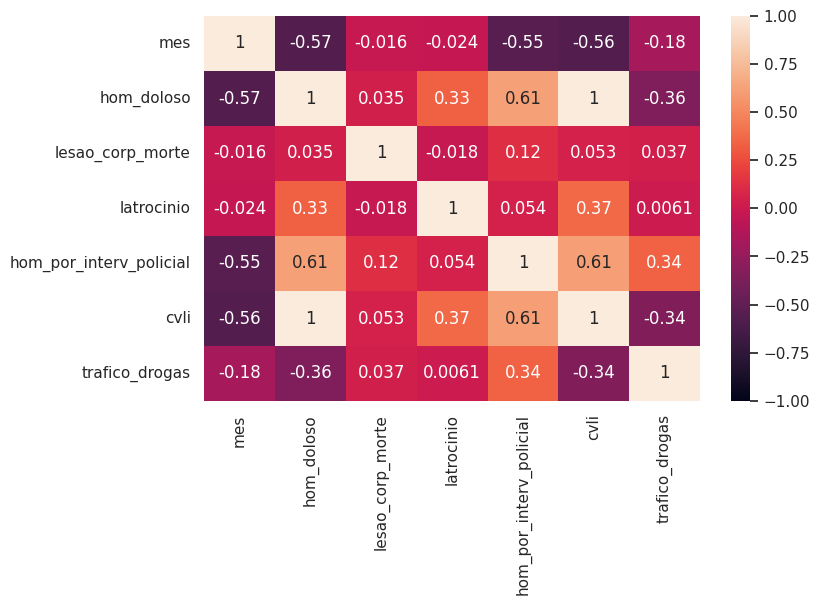

In [48]:
# Visualizando a matriz de correlação
sns.heatmap(seg_pub_rj_2020.corr(method='pearson'), annot=True, vmin=-1, vmax=1);

**Análise de correlação**

*Homicídio doloso x Homicídio por intervenção policial*: Correlação positiva forte (0,61)

*Homicídio doloso x Crimes violentos letais intencionais (CVLI)*: Correlação positiva muito forte/perfeita (1,0)

*Homicídio por intervenção policial x Crimes violentos letais intencionais (CVLI)*: Correlação positiva forte (0,61)
